<a href="https://colab.research.google.com/github/Jhonatan19991/Proyecto-programacion/blob/main/programacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
sns.set()

In [ ]:
#carga de datos
datos = pd.read_csv("/content/data.csv")


##40Gb ram
#8 procesadores 3.2 Gz
#promedio porcentaje de ram y cpu

# crear una columna con la fecha y hora completa en formato "dd/mm/yyyy HH:MM:SS"
datos['Fecha_Hora'] = pd.to_datetime(datos['dia'].astype(str) + '/' + datos['mes'].astype(str) + '/2023 ' + datos['hora'].astype(str) + ':' + datos['minuto'].astype(str), format='%d/%m/%Y %H:%M') + pd.Timedelta(hours=2)


#separar fecha y hora_minuto en columnas distintas
datos['fecha'] = pd.to_datetime(datos['Fecha_Hora'], format='%d/%m/%Y %H:%M:%S').dt.strftime('%d/%m/%Y')
datos['hora_minuto'] = pd.to_datetime(datos['Fecha_Hora'], format='%d/%m/%Y %H:%M:%S').dt.strftime('%H:%M:%S')


#crear una columna con el día de la semana
datos['dia_semana'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y').dt.day_name()

datos = datos.drop(['dia_de_la_semana', 'dia', 'hora','minuto', 'Fecha_Hora', 'mes'], axis=1)

#separar hora_minuto en distintas columnas (hora, minuto, segundo)
datos[['hora', 'minuto', 'segundo']] = datos['hora_minuto'].str.split(':', expand=True)

#separar el numero de mes y el nombre del mes proveniente de la fecha en otra columna
datos['num_mes'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y').dt.month
datos['nombre_mes'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y').dt.month_name()

#segundos no es necesario, por ende, se elimina
datos = datos.drop('segundo', axis=1)
datos['fecha'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y')
datos.loc[datos['top_1'] == "php", 'top_1'] = 'Scripts'
datos.loc[datos['top_2'] == "php", 'top_2'] = 'Scripts'
datos.loc[datos['top_3'] == "php", 'top_3'] = 'Scripts'

#datos a excel
datos.to_excel('datos_paygo.xlsx', index=False)

datos

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
0,7.8,11.0,Scripts,uwsgi,httpd,2023-03-13,17:19:00,Monday,17,19,3,March
1,13.6,8.6,uwsgi,python3,httpd,2023-03-13,17:24:00,Monday,17,24,3,March
2,10.4,8.4,uwsgi,python3,httpd,2023-03-13,17:27:00,Monday,17,27,3,March
3,10.1,8.4,uwsgi,python3,httpd,2023-03-13,17:30:00,Monday,17,30,3,March
4,8.7,8.4,uwsgi,python3,httpd,2023-03-13,17:33:00,Monday,17,33,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...
29816,9.4,8.3,python3,httpd,Scripts,2023-05-14,20:21:00,Sunday,20,21,5,May
29817,11.7,8.3,python3,httpd,Scripts,2023-05-14,20:24:00,Sunday,20,24,5,May
29818,8.7,8.1,python3,httpd,Scripts,2023-05-14,20:27:00,Sunday,20,27,5,May
29819,11.6,8.4,python3,httpd,Scripts,2023-05-14,20:30:00,Sunday,20,30,5,May


In [ ]:
datos[(datos["fecha"] == "2023-05-08")  & (datos["cpu_percent"] >= 70)]
#

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
26716,79.4,65.8,Scripts,uwsgi,httpd,2023-05-08,09:09:00,Monday,09,09,5,May
26717,70.6,50.6,Scripts,uwsgi,httpd,2023-05-08,09:12:00,Monday,09,12,5,May
26725,88.8,71.5,Scripts,uwsgi,python3,2023-05-08,09:36:00,Monday,09,36,5,May
26727,93.0,80.6,Scripts,uwsgi,python3,2023-05-08,09:42:00,Monday,09,42,5,May
26728,74.7,84.6,Scripts,uwsgi,python3,2023-05-08,09:45:00,Monday,09,45,5,May
26730,85.4,92.2,Scripts,uwsgi,redis-server,2023-05-08,09:51:00,Monday,09,51,5,May
26735,81.5,58.7,python3,amazon-cloudwatch-agent,httpd,2023-05-08,10:18:00,Monday,10,18,5,May
26770,70.0,44.0,Scripts,python3,amazon-cloudwatch-agent,2023-05-08,12:03:00,Monday,12,03,5,May
26785,79.6,46.8,Scripts,python3,amazon-cloudwatch-agent,2023-05-08,12:48:00,Monday,12,48,5,May
26786,75.8,69.0,Scripts,python3,amazon-cloudwatch-agent,2023-05-08,12:51:00,Monday,12,51,5,May


In [ ]:
#estos son los momentos en los que la cpu llego a mas de 90, es decir apunto de caerse el servidor
datos[datos['cpu_percent'] >= 90]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
4155,99.4,52.4,Scripts,uwsgi,httpd,2023-03-22,09:06:00,Wednesday,09,06,3,March
4634,98.9,49.5,Scripts,uwsgi,httpd,2023-03-23,09:03:00,Thursday,09,03,3,March
7032,90.9,41.1,Scripts,uwsgi,python3,2023-03-28,08:57:00,Tuesday,08,57,3,March
12858,98.0,8.0,httpd,uwsgi,amazon-cloudwatch-agent,2023-04-09,12:15:00,Sunday,12,15,4,April
13115,91.6,10.2,httpd,uwsgi,Scripts,2023-04-10,01:06:00,Monday,01,06,4,April
13829,91.2,63.4,Scripts,python3,httpd,2023-04-11,12:48:00,Tuesday,12,48,4,April
13830,98.3,69.9,Scripts,python3,httpd,2023-04-11,12:51:00,Tuesday,12,51,4,April
13833,99.9,70.9,httpd,Scripts,python3,2023-04-11,13:00:00,Tuesday,13,00,4,April
13856,99.4,72.8,httpd,python3,redis-server,2023-04-11,14:09:00,Tuesday,14,09,4,April
13858,94.9,71.6,httpd,Scripts,python3,2023-04-11,14:15:00,Tuesday,14,15,4,April


In [ ]:
grouped_data = datos.groupby(["dia_semana", "hora"])["cpu_percent"].mean()
df = grouped_data.unstack()
sorter= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorterIndex = dict(zip(sorter,range(len(sorter))))
df['Day_id'] = df.index
df['Day_id'] = df['Day_id'].map(sorterIndex)
df.sort_values('Day_id', inplace=True)
df




hora,00,01,02,03,04,05,06,07,08,09,...,15,16,17,18,19,20,21,22,23,Day_id
dia_semana,,,,,,,,,,,,,,,,,,,,,
Monday,11.843750,13.838125,9.457500,9.232500,9.431875,11.001875,12.761250,14.101875,19.868750,35.580380,...,18.560625,15.600000,12.744509,10.862778,10.611667,10.772778,10.851111,11.232222,10.882778,0
Tuesday,10.777778,11.904444,10.361111,10.793889,10.918333,11.664444,14.337222,18.100556,26.406667,45.916111,...,23.458889,18.142222,12.488889,10.502222,10.731111,11.556111,11.078889,10.455000,10.767222,1
Wednesday,10.566667,10.707778,10.347778,10.344444,10.728333,11.312222,14.881667,17.112778,26.501667,45.520556,...,20.813889,15.500556,11.482222,10.647778,10.026667,9.977222,10.704444,9.818333,10.145000,2
Thursday,9.684444,10.817222,9.628333,10.387222,10.122778,11.039444,13.799444,18.017222,26.688889,48.602222,...,22.323889,16.028333,12.603889,10.265000,10.483333,10.164444,10.080000,10.078333,9.737222,3
Friday,9.793333,10.618889,9.782222,9.794444,9.797778,10.280556,14.565556,18.191111,26.968889,48.341111,...,19.032222,15.902778,13.713889,11.787778,10.080556,9.632222,10.045000,9.957222,9.935000,4
Saturday,10.035000,10.359444,9.556111,9.716111,9.717778,9.833333,10.411667,10.285000,10.947778,12.483889,...,10.185000,10.657778,10.233333,10.546667,10.471111,11.250556,11.361111,11.496111,10.697222,5
Sunday,10.592222,11.499444,10.263889,10.302222,10.707778,10.919444,10.891111,11.191667,10.621667,10.191111,...,11.733889,11.221667,11.254444,11.728333,11.801667,10.752326,11.249375,10.486250,11.621250,6


In [ ]:
datos[(datos["dia_semana"] == "Monday") & (datos["hora"] == "11")]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
3233,9.8,8.3,uwsgi,python3,httpd,2023-03-20,11:00:00,Monday,11,00,3,March
3234,8.1,8.2,uwsgi,python3,httpd,2023-03-20,11:03:00,Monday,11,03,3,March
3235,23.3,8.1,uwsgi,python3,httpd,2023-03-20,11:06:00,Monday,11,06,3,March
3236,8.4,8.1,uwsgi,python3,httpd,2023-03-20,11:09:00,Monday,11,09,3,March
3237,7.6,8.2,uwsgi,python3,httpd,2023-03-20,11:12:00,Monday,11,12,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...
26764,62.6,34.0,python3,httpd,amazon-cloudwatch-agent,2023-05-08,11:45:00,Monday,11,45,5,May
26765,53.2,35.2,Scripts,python3,amazon-cloudwatch-agent,2023-05-08,11:48:00,Monday,11,48,5,May
26766,22.0,27.7,Scripts,python3,amazon-cloudwatch-agent,2023-05-08,11:51:00,Monday,11,51,5,May
26767,33.1,27.0,python3,amazon-cloudwatch-agent,httpd,2023-05-08,11:54:00,Monday,11,54,5,May


In [ ]:
#Los lunes festivos afectan de que en el mapa de calor se vea mas claro 

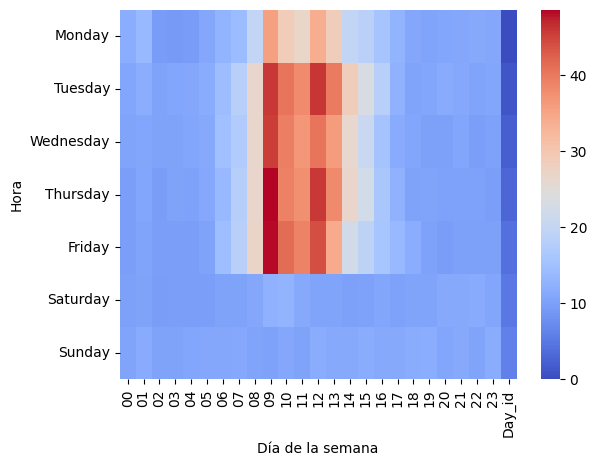

In [ ]:



sns.heatmap(df, cmap="coolwarm")


plt.ylabel("Hora")
plt.xlabel("Día de la semana")


plt.show()

In [ ]:
#los lunes los padres recargan mas por eso en la grafica de calor sale mas

In [ ]:
semana1 = datos[datos['fecha'] <= '17-03-2023']

semana1


<ipython-input-242-07f706e10b7e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  semana1 = datos[datos['fecha'] <= '17-03-2023']


,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
0,7.8,11.0,Scripts,uwsgi,httpd,2023-03-13,17:19:00,Monday,17,19,3,March
1,13.6,8.6,uwsgi,python3,httpd,2023-03-13,17:24:00,Monday,17,24,3,March
2,10.4,8.4,uwsgi,python3,httpd,2023-03-13,17:27:00,Monday,17,27,3,March
3,10.1,8.4,uwsgi,python3,httpd,2023-03-13,17:30:00,Monday,17,30,3,March
4,8.7,8.4,uwsgi,python3,httpd,2023-03-13,17:33:00,Monday,17,33,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...
2048,8.4,8.2,uwsgi,python3,httpd,2023-03-17,23:45:00,Friday,23,45,3,March
2049,8.8,8.4,uwsgi,python3,httpd,2023-03-17,23:48:00,Friday,23,48,3,March
2050,9.0,8.2,uwsgi,python3,httpd,2023-03-17,23:51:00,Friday,23,51,3,March
2051,10.5,8.3,uwsgi,python3,httpd,2023-03-17,23:54:00,Friday,23,54,3,March


In [ ]:
#promedio de cpu cuando una app esta en el top1
datos.groupby("top_1")["cpu_percent"].mean()

top_1
Scripts                    34.085649
amazon-cloudwatch-agent    16.450000
httpd                      11.897240
kswapd0                    38.850000
python3                    11.771228
redis-server               31.300000
uwsgi                      10.779519
Name: cpu_percent, dtype: float64

In [ ]:
datos.groupby("top_2")["cpu_percent"].mean().sort_values(ascending = False)

top_2
redis-server               33.800000
uwsgi                      21.428302
httpd                      16.173863
amazon-cloudwatch-agent    13.570787
python3                    13.078663
Scripts                    12.000499
mongodump                  11.900000
Name: cpu_percent, dtype: float64

In [ ]:
datos.groupby("top_3")["cpu_percent"].mean().sort_values(ascending = False)

top_3
redis-server               38.483102
python3                    24.604441
uwsgi                      18.547151
httpd                      16.608060
mongodump                  15.933333
amazon-cloudwatch-agent    13.679032
Scripts                    10.701427
certbot                    10.400000
Name: cpu_percent, dtype: float64

In [ ]:
datos["top_1"].value_counts()

uwsgi                      9609
httpd                      6486
Scripts                    5010
python3                    2353
amazon-cloudwatch-agent       2
kswapd0                       2
redis-server                  1
Name: top_1, dtype: int64

In [ ]:
hora_pico = datos[((datos["hora"] == "09") | (datos["hora"] == "12") | (datos["hora"] == "11") | (datos["hora"] == "10") | (datos["hora"] == "13")) & ((datos['dia_semana'] != "Saturday") & (datos["dia_semana"] != "Sunday"))]
hora_pico.to_excel('hora_pico.xlsx', index=False)

In [ ]:
dia = hora_pico.groupby(["dia_semana", "hora"])["cpu_percent"].mean()
print(f"El dia {dia.idxmax()[0]} a las {dia.idxmax()[1]} de la mañana tiene el mayor porcentaje promedio de cpu el cual es: {dia.max()}%")

El dia Thursday a las 09 de la mañana tiene el mayor porcentaje promedio de cpu el cual es: 48.60222222222222%


In [ ]:
day = hora_pico.groupby("dia_semana")["cpu_percent"].mean()
print(f"El dia con mayor promedio de usar cpu es: {day.idxmax()} con un porcentaje de {day.max()}%")

El dia con mayor promedio de usar cpu es: Tuesday con un porcentaje de 42.095666666666666%


In [ ]:
dia = hora_pico.groupby(["dia_semana", "hora"])["ram_percent"].mean()
print(f"El dia {dia.idxmax()[0]} a las {dia.idxmax()[1]} de la mañana tiene el mayor porcentaje promedio de ram el cual es: {dia.max()}%")

El dia Tuesday a las 12 de la mañana tiene el mayor porcentaje promedio de ram el cual es: 38.074444444444445%


In [ ]:
day = hora_pico.groupby("dia_semana")["ram_percent"].mean()
print(f"El dia con mayor promedio de usar ram es: {day.idxmax()} con un porcentaje de {day.max()}%")

El dia con mayor promedio de usar ram es: Tuesday con un porcentaje de 36.30244444444445%


In [ ]:
count = hora_pico["top_1"].value_counts()


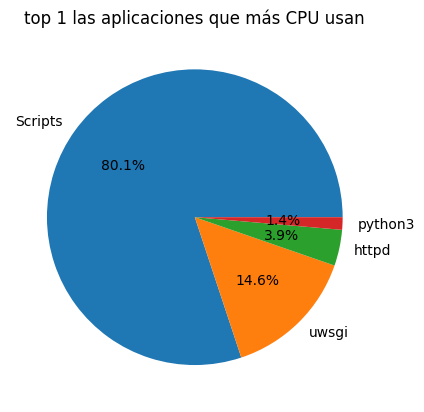

In [ ]:

count = hora_pico["top_1"].value_counts()[0:-1]
plt.pie(count ,autopct="%1.1f%%", labels=count.index.tolist())
plt.title("top 1 las aplicaciones que más CPU usan")
plt.show()



Text(0.5, 1.0, 'Scripts')

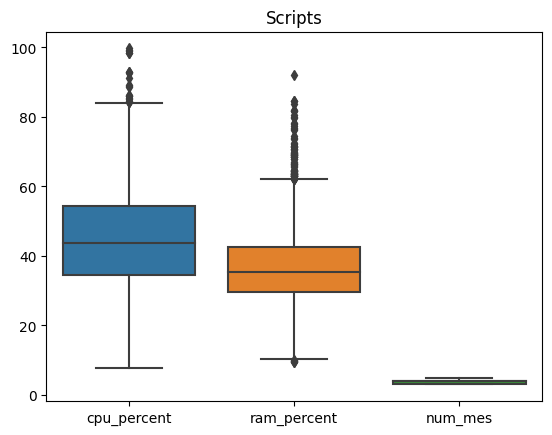

In [ ]:
sns.boxplot(hora_pico[(hora_pico["top_1"] == "Scripts")])
plt.title("Scripts")

In [ ]:
hora_pico[hora_pico["cpu_percent"] >= 80]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
324,84.2,38.6,Scripts,uwsgi,python3,2023-03-14,09:33:00,Tuesday,09,33,3,March
4155,99.4,52.4,Scripts,uwsgi,httpd,2023-03-22,09:06:00,Wednesday,09,06,3,March
4634,98.9,49.5,Scripts,uwsgi,httpd,2023-03-23,09:03:00,Thursday,09,03,3,March
4705,83.6,47.2,Scripts,uwsgi,httpd,2023-03-23,12:36:00,Thursday,12,36,3,March
7535,86.0,54.0,Scripts,uwsgi,httpd,2023-03-29,10:06:00,Wednesday,10,06,3,March
8488,80.4,51.7,Scripts,uwsgi,python3,2023-03-31,09:45:00,Friday,09,45,3,March
13764,85.3,70.6,Scripts,python3,httpd,2023-04-11,09:33:00,Tuesday,09,33,4,April
13773,81.9,57.6,Scripts,python3,redis-server,2023-04-11,10:00:00,Tuesday,10,00,4,April
13782,86.5,66.9,python3,httpd,redis-server,2023-04-11,10:27:00,Tuesday,10,27,4,April
13800,85.7,71.9,python3,redis-server,Scripts,2023-04-11,11:21:00,Tuesday,11,21,4,April


In [ ]:
hora_pico["top_2"].value_counts()

httpd                      1757
uwsgi                      1611
python3                     878
Scripts                     131
redis-server                 10
amazon-cloudwatch-agent       9
Name: top_2, dtype: int64

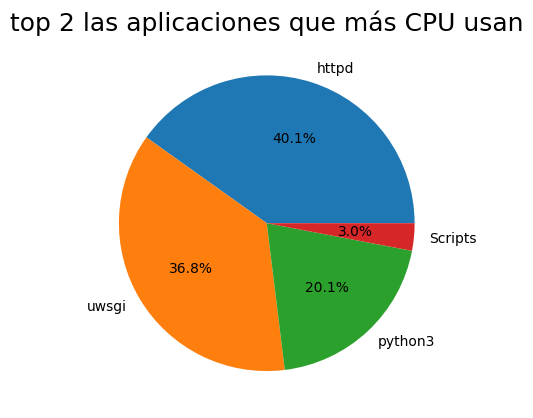

In [ ]:
count = hora_pico["top_2"].value_counts()[:-2]
plt.pie(count ,autopct="%1.1f%%", labels=count.index.tolist())
plt.title("top 2 las aplicaciones que más CPU usan", fontsize=18)
plt.show()

In [ ]:
hora_pico["top_3"].value_counts()

httpd                      1565
python3                    1542
redis-server                465
Scripts                     330
uwsgi                       258
amazon-cloudwatch-agent     234
node                          2
Name: top_3, dtype: int64

In [ ]:
datos[datos["top_3"] == "node"]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
23882,28.1,30.9,Scripts,httpd,node,2023-05-02,11:27:00,Tuesday,11,27,5,May
23883,33.9,35.8,Scripts,httpd,node,2023-05-02,11:30:00,Tuesday,11,30,5,May


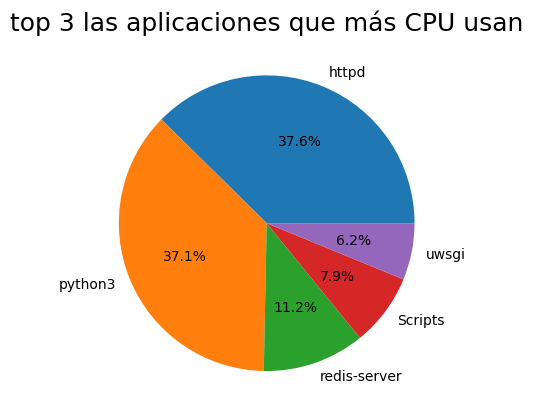

In [ ]:
count = hora_pico["top_3"].value_counts()[:-2]
plt.pie(count ,autopct="%1.1f%%", labels=count.index.tolist())
plt.title("top 3 las aplicaciones que más CPU usan", fontsize=18)
plt.show()

<ipython-input-21-5035ec0ee3a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semana1['fecha'] = semana1['fecha'].dt.strftime('%d/%m/%Y')
<ipython-input-21-5035ec0ee3a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semana1['fechahora'] = semana1['fecha'] +' '+ semana1['hora_minuto']


<Axes: xlabel='fechahora', ylabel='cpu_percent'>

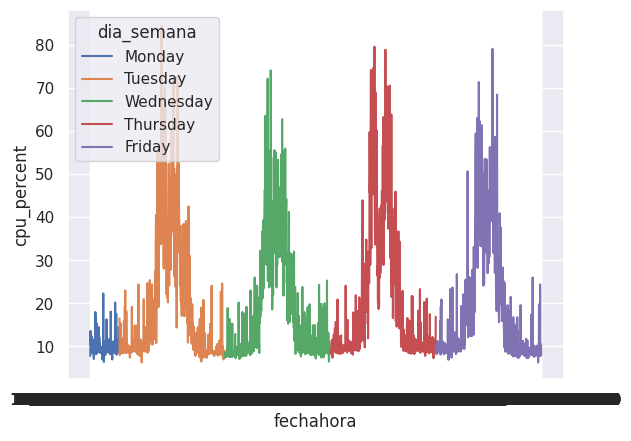

In [ ]:
semana1 = datos[datos["fecha"] <= "2023-03-17" ]
semana1['fecha'] = semana1['fecha'].dt.strftime('%d/%m/%Y')
semana1['fechahora'] = semana1['fecha'] +' '+ semana1['hora_minuto']
semana1
sns.set_theme(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x="fechahora", y="cpu_percent",hue ='dia_semana',
              
             data=semana1)

<ipython-input-256-e2bda51886c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  martes1['timestamp'] = pd.to_datetime(martes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-256-e2bda51886c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  martes1['hora_minuto'] = pd.to_datetime(martes1['timestamp']).dt.hour


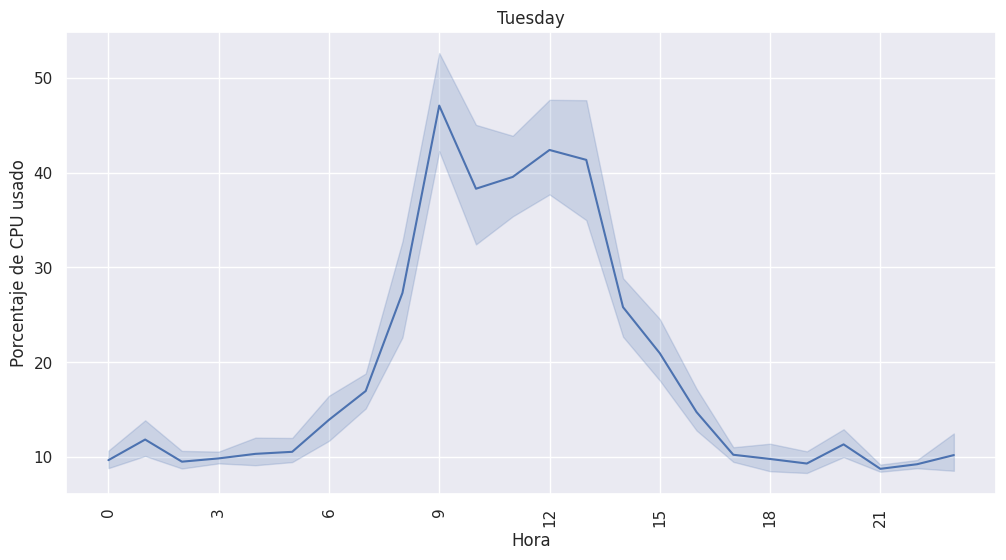

In [ ]:
sns.set_theme(style="darkgrid")
martes1 = semana1[semana1['dia_semana'] == 'Tuesday']
martes1['timestamp'] = pd.to_datetime(martes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
martes1['hora_minuto'] = pd.to_datetime(martes1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent", data=martes1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Tuesday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 



<ipython-input-257-f9ba48dbdb58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miercoles1['timestamp'] = pd.to_datetime(miercoles1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-257-f9ba48dbdb58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miercoles1['hora_minuto'] = pd.to_datetime(miercoles1['timestamp']).dt.hour


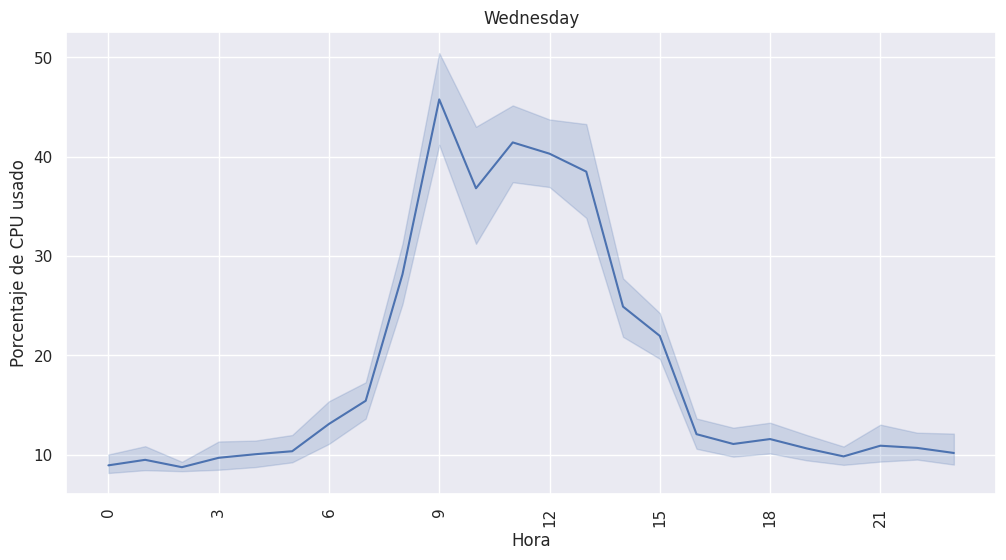

In [ ]:
miercoles1 = semana1[semana1['dia_semana'] == 'Wednesday']
miercoles1['timestamp'] = pd.to_datetime(miercoles1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
miercoles1['hora_minuto'] = pd.to_datetime(miercoles1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=miercoles1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Wednesday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 

<ipython-input-258-72e327142282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jueves1['timestamp'] = pd.to_datetime(jueves1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-258-72e327142282>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jueves1['hora_minuto'] = pd.to_datetime(jueves1['timestamp']).dt.hour


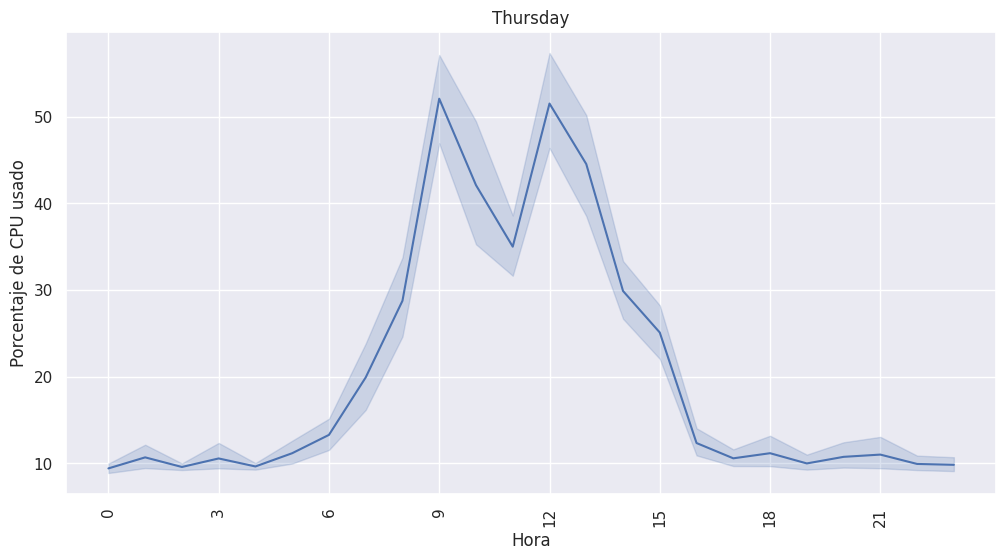

In [ ]:
jueves1 = semana1[semana1['dia_semana'] == 'Thursday']
jueves1['timestamp'] = pd.to_datetime(jueves1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
jueves1['hora_minuto'] = pd.to_datetime(jueves1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=jueves1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Thursday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 

<ipython-input-259-e4f2dcc6bd7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viernes1['timestamp'] = pd.to_datetime(viernes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-259-e4f2dcc6bd7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viernes1['hora_minuto'] = pd.to_datetime(viernes1['timestamp']).dt.hour


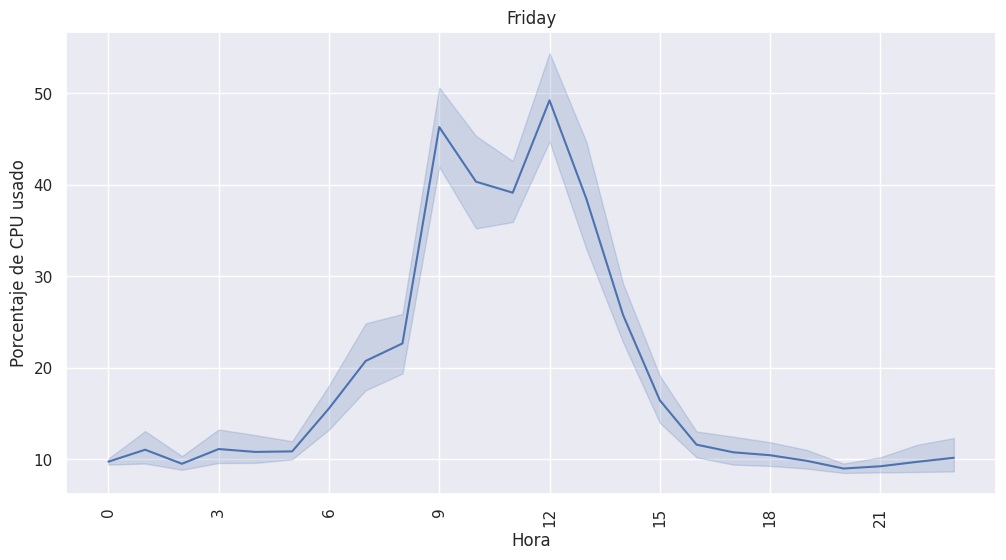

In [ ]:
viernes1 = semana1[semana1['dia_semana'] == 'Friday']
viernes1['timestamp'] = pd.to_datetime(viernes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
viernes1['hora_minuto'] = pd.to_datetime(viernes1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=viernes1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Friday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 

In [ ]:
cpu_max = datos['cpu_percent'].max()
cpu_min = datos['cpu_percent'].min()
ram_max = datos['ram_percent'].max()
ram_min = datos['ram_percent'].min()
print(cpu_max, cpu_min, ram_max, ram_min)

99.9 1.9 92.2 5.2


In [ ]:
datos[datos["cpu_percent"] == 1.9]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
11948,1.9,9.8,uwsgi,httpd,Scripts,2023-04-07,14:45:00,Friday,14,45,4,April


In [ ]:
#rango
rango_cpu = cpu_max - cpu_min
rango_ram = ram_max - ram_min
print(rango_cpu, rango_ram)

98.0 87.0


In [ ]:
#Mediana de la cpu
median_cpu = datos['cpu_percent'].median()
median_cpu

9.9

In [ ]:
#Mediana de la ram
median_ram = datos['ram_percent'].median()
median_ram

8.4

<function matplotlib.pyplot.show(close=None, block=None)>

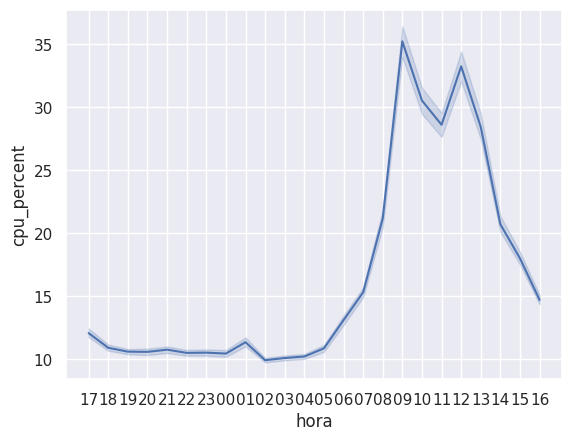

In [ ]:
x = datos['hora']
y = datos['cpu_percent']
sns.lineplot(x= datos['hora'] , y = datos['cpu_percent'], data= datos)
plt.show

<Axes: xlabel='ram_percent'>

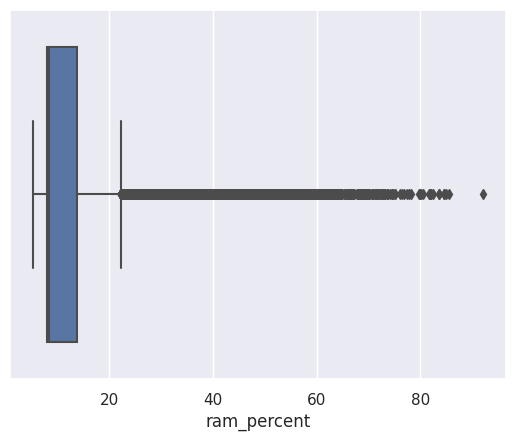

In [ ]:
#Distribucion de la ram
sns.boxplot(x = 'ram_percent', data = datos)

<Axes: xlabel='cpu_percent'>

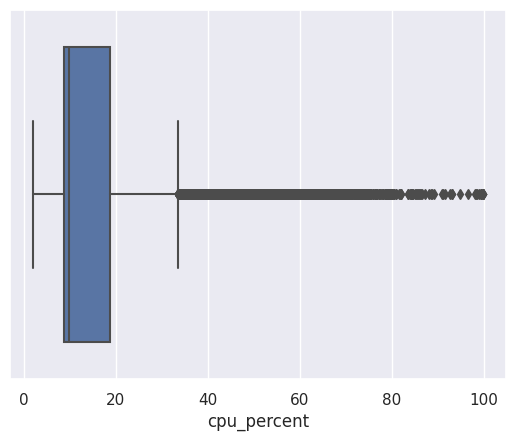

In [ ]:
#distribucion de la cpu
sns.boxplot(x='cpu_percent', data= datos)

In [ ]:
datos[datos['ram_percent'] > 77] 

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
13755,74.0,85.5,httpd,Scripts,python3,2023-04-11,09:06:00,Tuesday,09,06,4,April
13756,7.8,77.9,Scripts,python3,redis-server,2023-04-11,09:09:00,Tuesday,09,09,4,April
13780,77.7,83.6,python3,httpd,amazon-cloudwatch-agent,2023-04-11,10:21:00,Tuesday,10,21,4,April
13795,54.4,79.9,Scripts,python3,redis-server,2023-04-11,11:06:00,Tuesday,11,06,4,April
13799,62.7,83.6,Scripts,python3,redis-server,2023-04-11,11:18:00,Tuesday,11,18,4,April
13801,47.3,79.8,Scripts,python3,redis-server,2023-04-11,11:24:00,Tuesday,11,24,4,April
13802,77.1,82.0,Scripts,python3,httpd,2023-04-11,11:27:00,Tuesday,11,27,4,April
13822,73.3,82.5,httpd,Scripts,python3,2023-04-11,12:27:00,Tuesday,12,27,4,April
13824,68.6,77.5,Scripts,httpd,amazon-cloudwatch-agent,2023-04-11,12:33:00,Tuesday,12,33,4,April
13831,65.8,81.9,python3,httpd,redis-server,2023-04-11,12:54:00,Tuesday,12,54,4,April


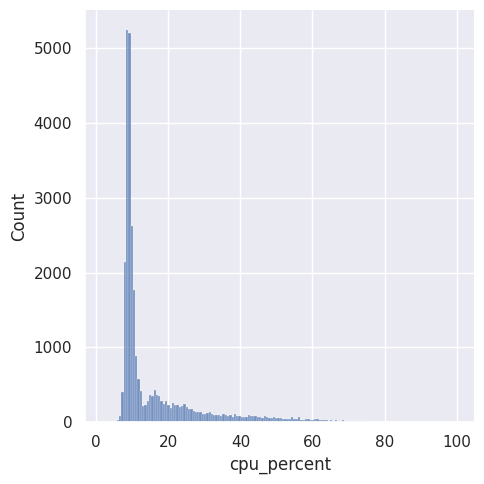

In [ ]:
sns.displot(datos, x='cpu_percent', multiple='stack')

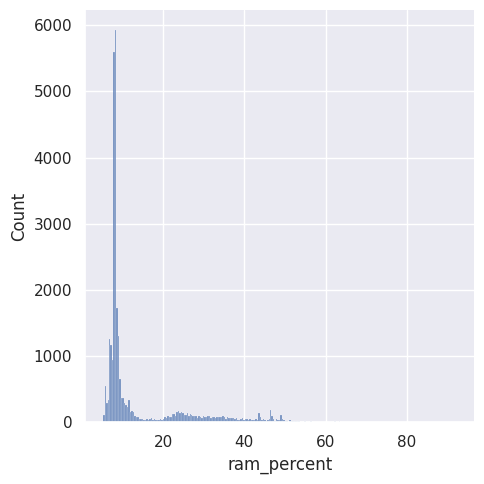

In [ ]:
sns.displot(datos, x='ram_percent', multiple='stack')

<Axes: xlabel='top_1', ylabel='Count'>

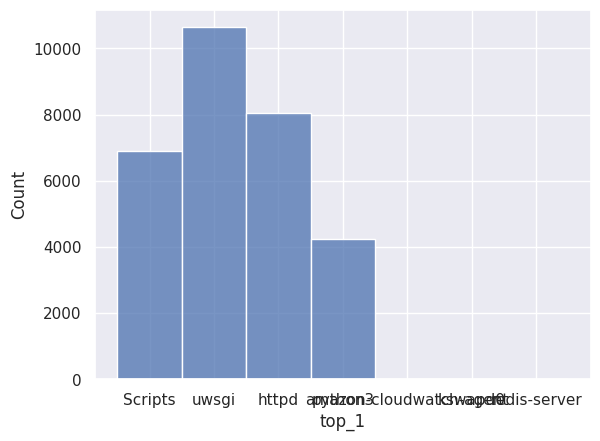

In [ ]:
sns.histplot(datos, x = "top_1")

<Axes: xlabel='top_2', ylabel='Count'>

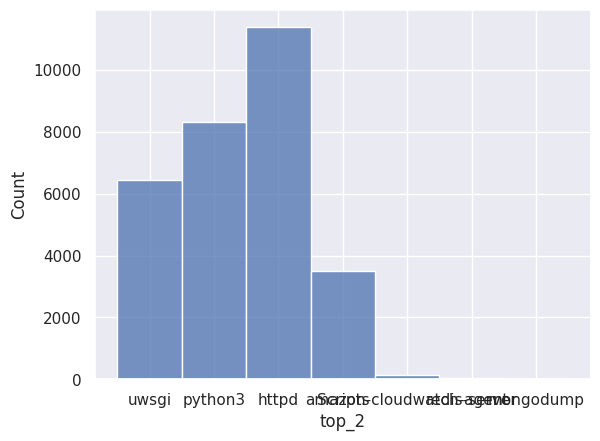

In [ ]:
sns.histplot(datos, x = "top_2" )

<Axes: xlabel='top_3', ylabel='Count'>

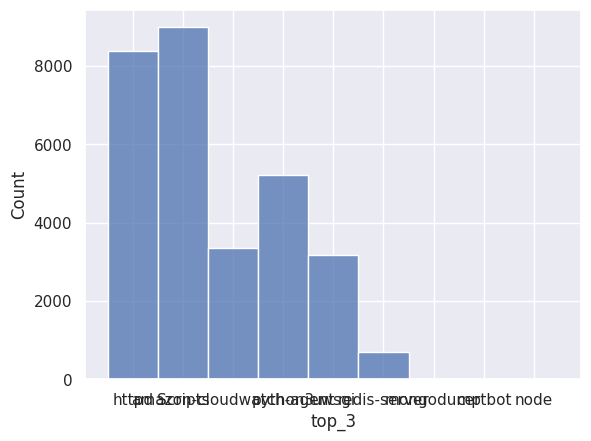

In [ ]:
sns.histplot(datos, x = "top_3" )

In [ ]:


# Convertir la columna "fecha" en tipo fecha
datos_prueba = datos.copy()
datos_prueba['fecha'] = pd.to_datetime(datos_prueba['fecha'])
datos_prueba['num_semana'] = datos_prueba['fecha'].dt.strftime('%Y-%U')
# Agrupar por semana y calcular el promedio de "cpu_percent"
semanas = datos_prueba.groupby('num_semana')['cpu_percent'].mean()
semanas
semana_alta = datos_prueba[datos_prueba['num_semana'] == "2023-15"]
prom_semana_alta = semana_alta.groupby("hora")["cpu_percent"].mean()

In [ ]:
semana_santa = datos[(datos['fecha'] >= '2023-04-03') & (datos['fecha'] <= '2023-04-07')]

prom_semana = semana_santa.groupby("hora")["cpu_percent"].mean()
prom_semana

hora
00    10.995
01    11.832
02     9.173
03     9.461
04    10.516
05    10.248
06    10.924
07    10.588
08     9.974
09    11.057
10    10.547
11    10.839
12    10.795
13    10.113
14    11.352
15    10.289
16     9.506
17    11.004
18    10.978
19    10.450
20     9.711
21    11.291
22    10.194
23    10.649
Name: cpu_percent, dtype: float64

<ipython-input-38-e9ad966be64a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=prom_semana_alta, x=prom_semana_alta.index.tolist(), y=prom_semana_alta, ax=ax[0],palette='rocket_r',linewidth=10,color = "g")
<ipython-input-38-e9ad966be64a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=prom_semana, x=prom_semana.index.tolist(), y=prom_semana, ax=ax[1],palette='rocket_r',linewidth=10,color = "g")
<ipython-input-38-e9ad966be64a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks())
<ipython-input-38-e9ad966be64a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticks())


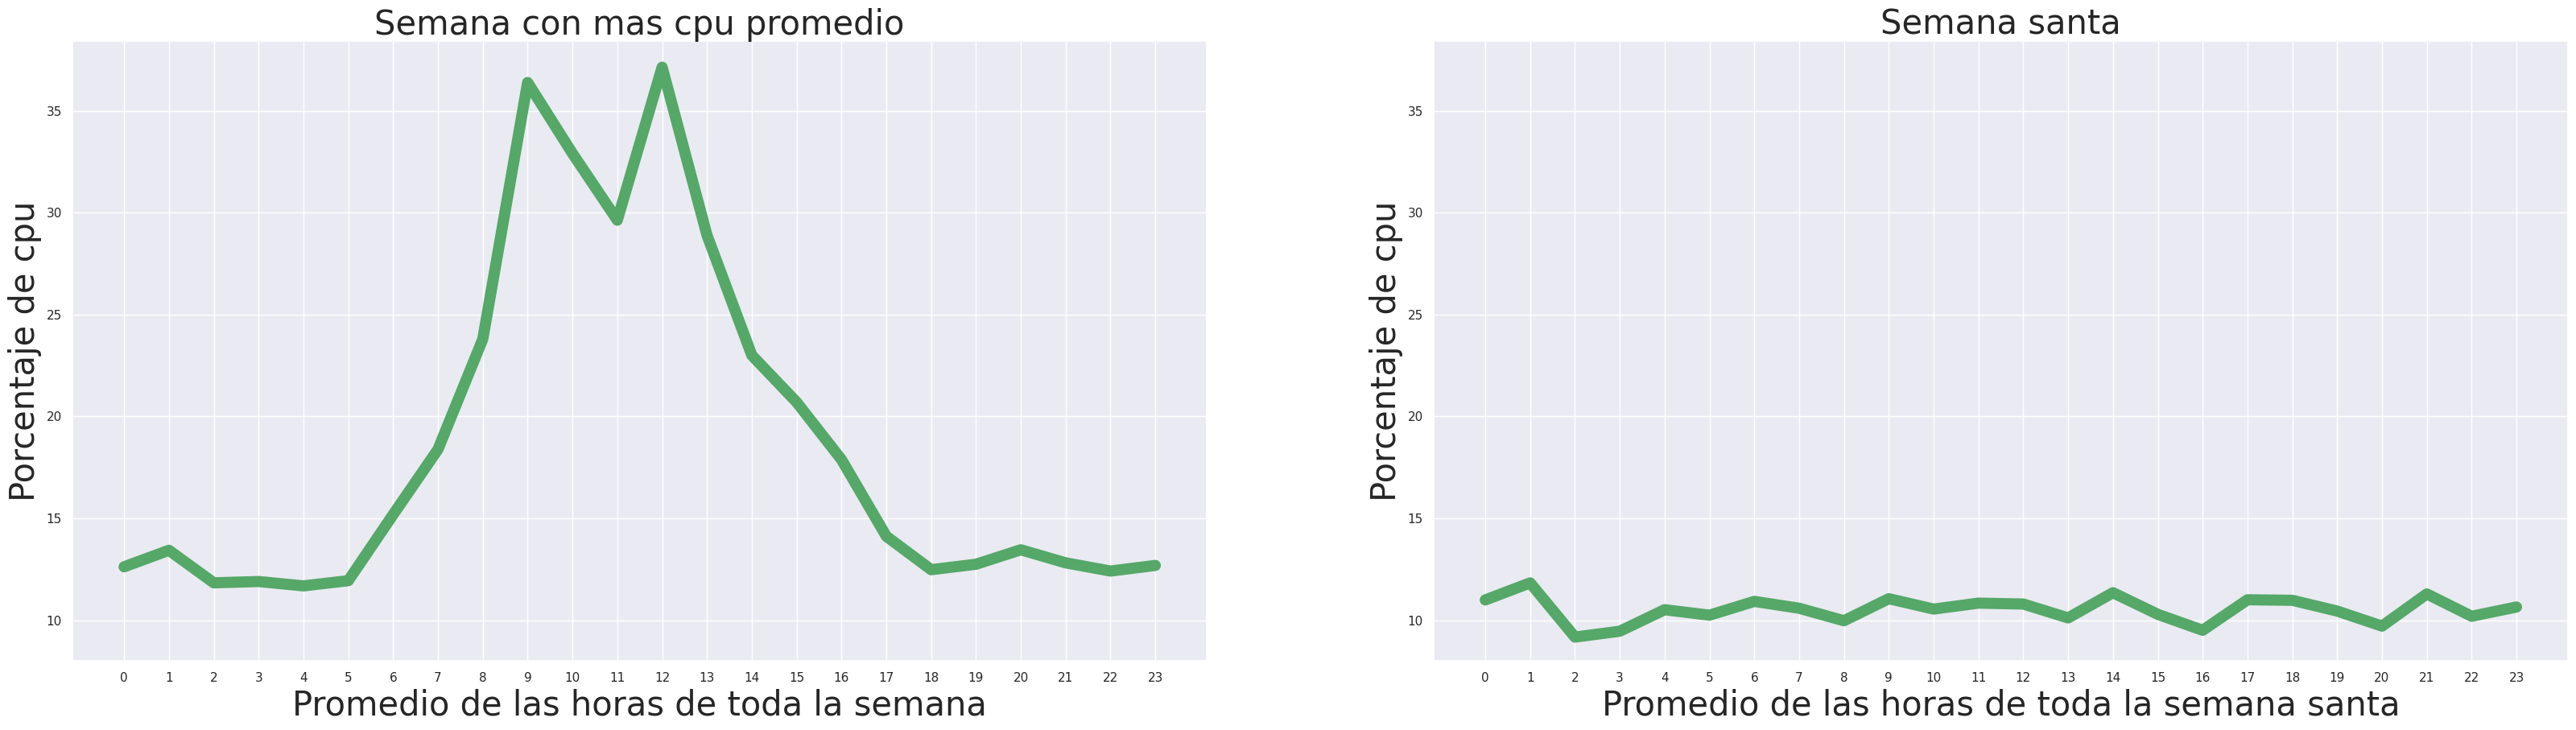

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(40, 10))
sns.lineplot(data=prom_semana_alta, x=prom_semana_alta.index.tolist(), y=prom_semana_alta, ax=ax[0],palette='rocket_r',linewidth=10,color = "g")
plt.title("Semana con con porcentaje mas alto",size = 30)
sns.lineplot(data=prom_semana, x=prom_semana.index.tolist(), y=prom_semana, ax=ax[1],palette='rocket_r',linewidth=10,color = "g")
max_lim = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(8, max_lim)
ax[1].set_ylim(8, max_lim)
ax[0].set_xlabel("Promedio de las horas de toda la semana",size = 30)
ax[0].set_ylabel("Porcentaje de cpu",size = 30)
ax[0].set_title("Semana con mas cpu promedio",size = 30)
ax[1].set_xlabel("Promedio de las horas de toda la semana santa",size = 30)
ax[1].set_ylabel("Porcentaje de cpu",size = 30)
ax[1].set_title("Semana santa",size = 30)
ax[0].set_xticklabels(ax[0].get_xticks())
ax[1].set_xticklabels(ax[1].get_xticks())
fig.savefig('subplots.jpg', format='jpg', dpi=300)





In [ ]:
# Convertir la columna "fecha" en tipo fecha
datos_prueba = datos.copy()
datos_prueba['fecha'] = pd.to_datetime(datos_prueba['fecha'])
datos_prueba['num_semana'] = datos_prueba['fecha'].dt.strftime('%Y-%U')
# Agrupar por semana y calcular el promedio de "cpu_percent"
semanas = datos_prueba.groupby('num_semana')['ram_percent'].mean()
semanas
semana_alta = datos_prueba[datos_prueba['num_semana'] == "2023-15"]
prom_semana_alta = semana_alta.groupby("hora")["ram_percent"].mean()
semana_santa = datos[(datos['fecha'] >= '2023-04-03') & (datos['fecha'] <= '2023-04-07')]

prom_semana = semana_santa.groupby("hora")["ram_percent"].mean()


<ipython-input-58-0399cfb5114e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=prom_semana_alta, x=prom_semana_alta.index.tolist(), y=prom_semana_alta, ax=ax[0],palette='rocket_r',linewidth=10, color = "g")
<ipython-input-58-0399cfb5114e>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=prom_semana, x=prom_semana.index.tolist(), y=prom_semana, ax=ax[1],palette='rocket_r',linewidth=10,color = "g")
<ipython-input-58-0399cfb5114e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks())
<ipython-input-58-0399cfb5114e>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticks())


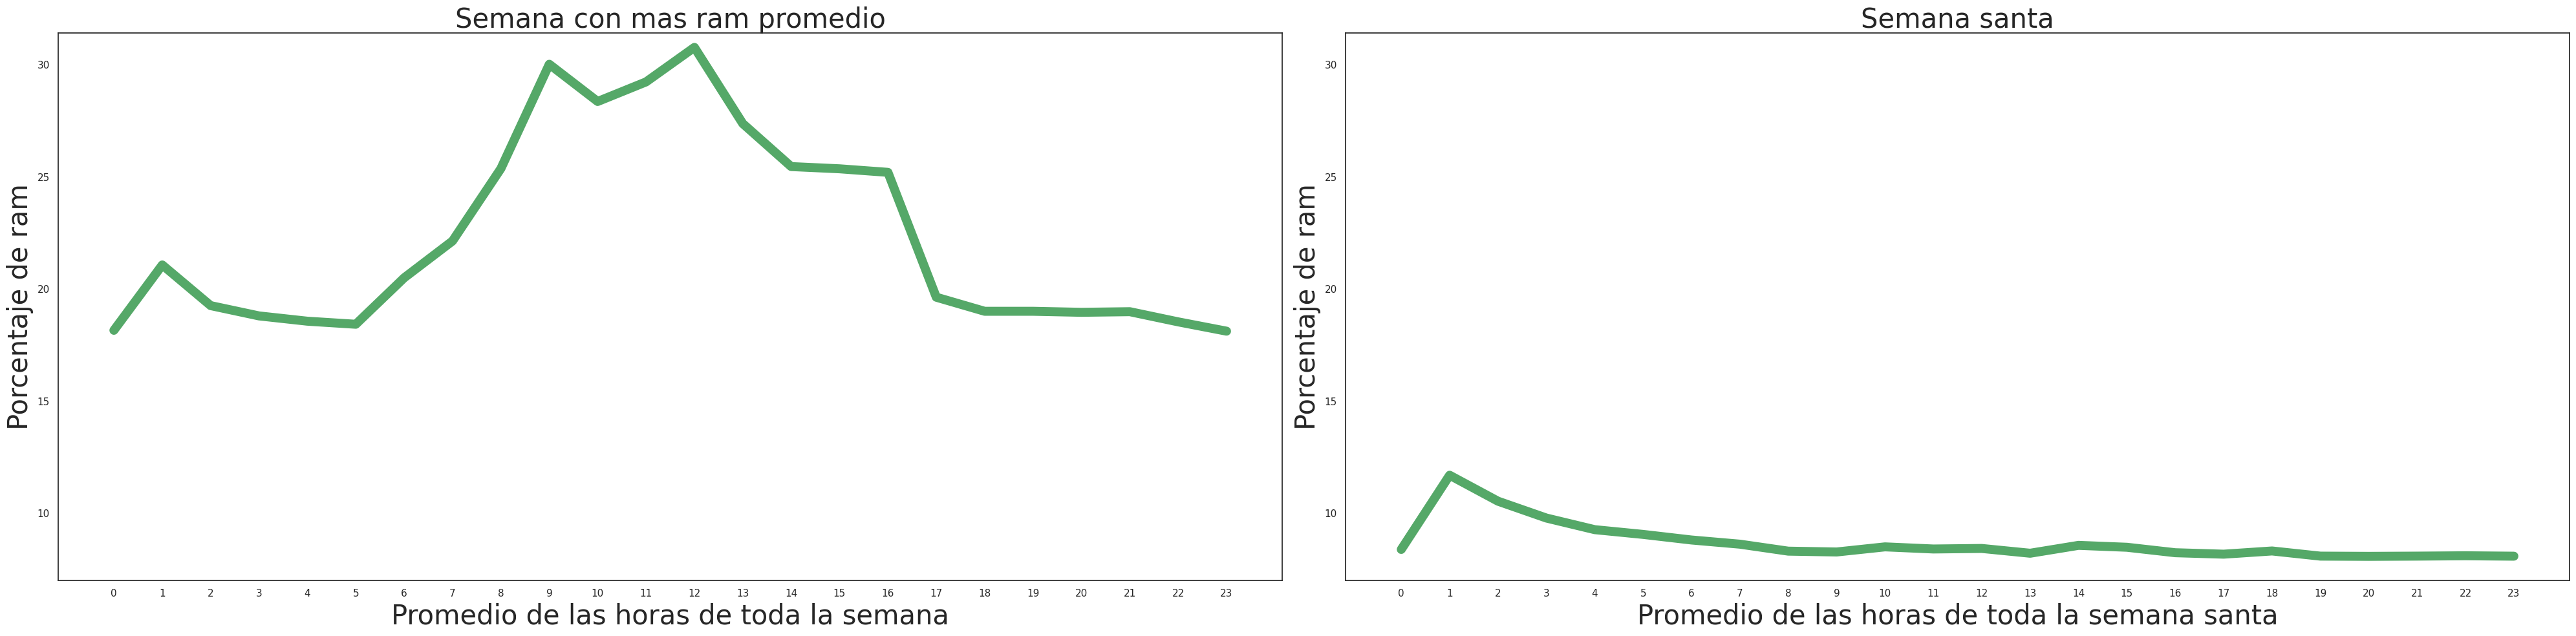

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(1, 2, figsize=(40, 10))
sns.lineplot(data=prom_semana_alta, x=prom_semana_alta.index.tolist(), y=prom_semana_alta, ax=ax[0],palette='rocket_r',linewidth=10, color = "g")
plt.title("Semana con con porcentaje mas alto",size = 30)
sns.lineplot(data=prom_semana, x=prom_semana.index.tolist(), y=prom_semana, ax=ax[1],palette='rocket_r',linewidth=10,color = "g")
max_lim = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(7, max_lim)
ax[1].set_ylim(7, max_lim)
ax[0].set_xlabel("Promedio de las horas de toda la semana", size = 30)
ax[0].set_ylabel("Porcentaje de ram",size = 30)
ax[0].set_title("Semana con mas ram promedio",size = 30)
ax[1].set_xlabel("Promedio de las horas de toda la semana santa",size = 30)
ax[1].set_ylabel("Porcentaje de ram",size = 30)
ax[1].set_title("Semana santa",size = 30)
ax[0].set_xticklabels(ax[0].get_xticks())
ax[1].set_xticklabels(ax[1].get_xticks())
fig.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
fig.savefig('subplotsram.jpg', format='jpg', dpi=300)


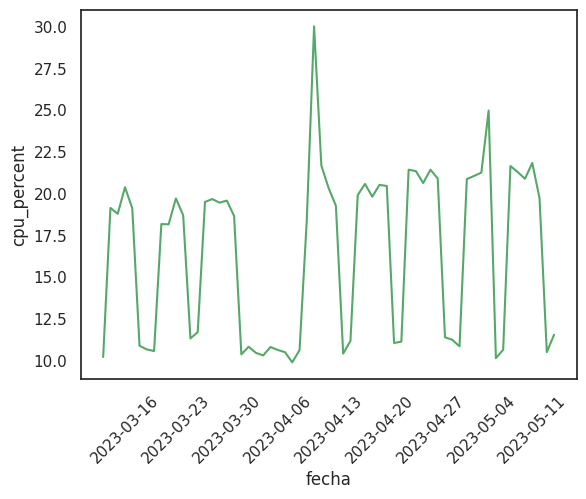

In [ ]:

from matplotlib.ticker import MultipleLocator

prom_todo = datos.groupby("fecha")["cpu_percent"].mean()

fig, ax = plt.subplots()
sns.lineplot(data=prom_todo, x=prom_todo.index, y=prom_todo, ax=ax,color = "g")

# Establecer ticks en el eje x cada 7 días
ax.xaxis.set_major_locator(MultipleLocator(7))

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

plt.show()

In [ ]:
mayo_8 = hora_pico.copy()
mayo_8 = mayo_8[(mayo_8["fecha"] == "2023-05-08") & ((mayo_8["hora"] == "09") | (mayo_8["hora"] == "10"))]
mayo_8

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
26713,68.7,52.5,Scripts,uwsgi,httpd,2023-05-08,09:00:00,Monday,09,00,5,May
26714,57.2,39.5,Scripts,uwsgi,httpd,2023-05-08,09:03:00,Monday,09,03,5,May
26715,50.5,35.1,Scripts,uwsgi,httpd,2023-05-08,09:06:00,Monday,09,06,5,May
26716,79.4,65.8,Scripts,uwsgi,httpd,2023-05-08,09:09:00,Monday,09,09,5,May
26717,70.6,50.6,Scripts,uwsgi,httpd,2023-05-08,09:12:00,Monday,09,12,5,May
26718,58.7,49.7,Scripts,uwsgi,httpd,2023-05-08,09:15:00,Monday,09,15,5,May
26719,62.9,40.2,Scripts,uwsgi,httpd,2023-05-08,09:18:00,Monday,09,18,5,May
26720,68.3,48.4,Scripts,uwsgi,httpd,2023-05-08,09:21:00,Monday,09,21,5,May
26721,49.1,45.0,Scripts,uwsgi,httpd,2023-05-08,09:24:00,Monday,09,24,5,May
26722,60.9,53.0,Scripts,uwsgi,httpd,2023-05-08,09:27:00,Monday,09,27,5,May


In [ ]:
# Nuevas filas a agregar
nuevas_filas = [
    {
        'cpu_percent': 0,
        'ram_percent': 0,
        'top_1': None,
        'top_2': None,
        'top_3': None,
        'fecha': '2023-05-08',
        'hora_minuto': '09:53:00',
        'dia_semana': 'Monday',
        'hora': '09',
        'minuto': '53',
        'num_mes': 5,
        'nombre_mes': 'May'
    },
    {
        'cpu_percent': 0,
        'ram_percent': 0,
        'top_1': None,
        'top_2': None,
        'top_3': None,
        'fecha': '2023-05-08',
        'hora_minuto': '09:55:00',
        'dia_semana': 'Monday',
        'hora': '09',
        'minuto': '55',
        'num_mes': 5,
        'nombre_mes': 'May'
    },
    {
        'cpu_percent': 0,
        'ram_percent': 0,
        'top_1': None,
        'top_2': None,
        'top_3': None,
        'fecha': '2023-05-08',
        'hora_minuto': '09:58:00',
        'dia_semana': 'Monday',
        'hora': '09',
        'minuto': '58',
        'num_mes': 5,
        'nombre_mes': 'May'
    },
    {
        'cpu_percent': 0,
        'ram_percent': 0,
        'top_1': None,
        'top_2': None,
        'top_3': None,
        'fecha': '2023-05-08',
        'hora_minuto': '10:01:00',
        'dia_semana': 'Monday',
        'hora': '10',
        'minuto': '01',
        'num_mes': 5,
        'nombre_mes': 'May'
    },
    {
        'cpu_percent': 0,
        'ram_percent': 0,
        'top_1': None,
        'top_2': None,
        'top_3': None,
        'fecha': '2023-05-08',
        'hora_minuto': '10:03:00',
        'dia_semana': 'Monday',
        'hora': '10',
        'minuto': '03',
        'num_mes': 5,
        'nombre_mes': 'May'
    },
    {
        'cpu_percent': 0,
        'ram_percent': 0,
        'top_1': None,
        'top_2': None,
        'top_3': None,
        'fecha': '2023-05-08',
        'hora_minuto': '10:05:00',
        'dia_semana': 'Monday',
        'hora': '10',
        'minuto': '05',
        'num_mes': 5,
        'nombre_mes': 'May'
    }
]

# Obtener índice de la última fila antes del rango de horas deseado
indice_ultimo = mayo_8.loc[mayo_8['hora_minuto'] == '09:51:00'].index.max()

# Insertar las nuevas filas en la
# Insertar las nuevas filas en la posición adecuada
mayo_8 = mayo_8.loc[:indice_ultimo].append(nuevas_filas, ignore_index=True).append(mayo_8.loc[indice_ultimo + 1:], ignore_index=True)


<ipython-input-60-566072f18e56>:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mayo_8 = mayo_8.loc[:indice_ultimo].append(nuevas_filas, ignore_index=True).append(mayo_8.loc[indice_ultimo + 1:], ignore_index=True)
<ipython-input-60-566072f18e56>:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mayo_8 = mayo_8.loc[:indice_ultimo].append(nuevas_filas, ignore_index=True).append(mayo_8.loc[indice_ultimo + 1:], ignore_index=True)


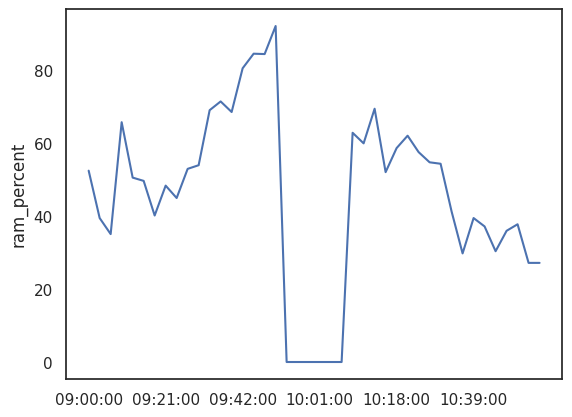

In [ ]:
#Poner la grafica del dia que se cayo, hoy 8 de mayo (deberia de tener valores vacios)

semana_especial =mayo_8.groupby("hora_minuto")["ram_percent"].mean()
fig, ax = plt.subplots()
sns.lineplot(data = semana_especial, x = semana_especial.index.tolist(), y = semana_especial, ax=ax)
# Establecer ticks en el eje x cada 7 días
ax.xaxis.set_major_locator(MultipleLocator(7))
# Rotar las etiquetas del eje x para mejorar la legibilidad
fig.savefig('caida.jpg', format='jpg', dpi=300)

plt.show()

In [ ]:
#Tabla en las veces que la ram supero a la cpu
datos[(datos["ram_percent"] > datos["cpu_percent"]) & (datos["cpu_percent"] > 70)]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
13755,74.0,85.5,httpd,Scripts,python3,2023-04-11,09:06:00,Tuesday,09,06,4,April
13780,77.7,83.6,python3,httpd,amazon-cloudwatch-agent,2023-04-11,10:21:00,Tuesday,10,21,4,April
13781,72.1,73.6,Scripts,python3,httpd,2023-04-11,10:24:00,Tuesday,10,24,4,April
13802,77.1,82.0,Scripts,python3,httpd,2023-04-11,11:27:00,Tuesday,11,27,4,April
13822,73.3,82.5,httpd,Scripts,python3,2023-04-11,12:27:00,Tuesday,12,27,4,April
26728,74.7,84.6,Scripts,uwsgi,python3,2023-05-08,09:45:00,Monday,09,45,5,May
26730,85.4,92.2,Scripts,uwsgi,redis-server,2023-05-08,09:51:00,Monday,09,51,5,May
28163,70.6,72.5,Scripts,python3,httpd,2023-05-11,09:42:00,Thursday,09,42,5,May


In [ ]:
archivo = pd.read_csv('/content/data.csv',header = 0)  
#Solo el mes3
mes3 = archivo["mes"] == 3
datos3 = archivo.loc[mes3,["mes","dia","cpu_percent"]]
cpu3 = datos3.groupby("dia")["cpu_percent"].mean()
total3 = pd.DataFrame(cpu3)
total3.insert(1, "mes", 3, allow_duplicates=False)


#Solo el mes4
mes4 = archivo["mes"] == 4
datos4 = archivo.loc[mes4,["mes","dia","cpu_percent"]]
cpu4 = datos4.groupby("dia")["cpu_percent"].mean()
total4 = pd.DataFrame(cpu4)
total4.insert(1, "mes", 4, allow_duplicates=False)

#Solo el mes5
mes5 = archivo["mes"] == 5
datos5 = archivo.loc[mes5,["mes","dia","cpu_percent"]]
cpu5 = datos5.groupby("dia")["cpu_percent"].mean()
total5 = pd.DataFrame(cpu5)
total5.insert(1, "mes", 5, allow_duplicates=False)

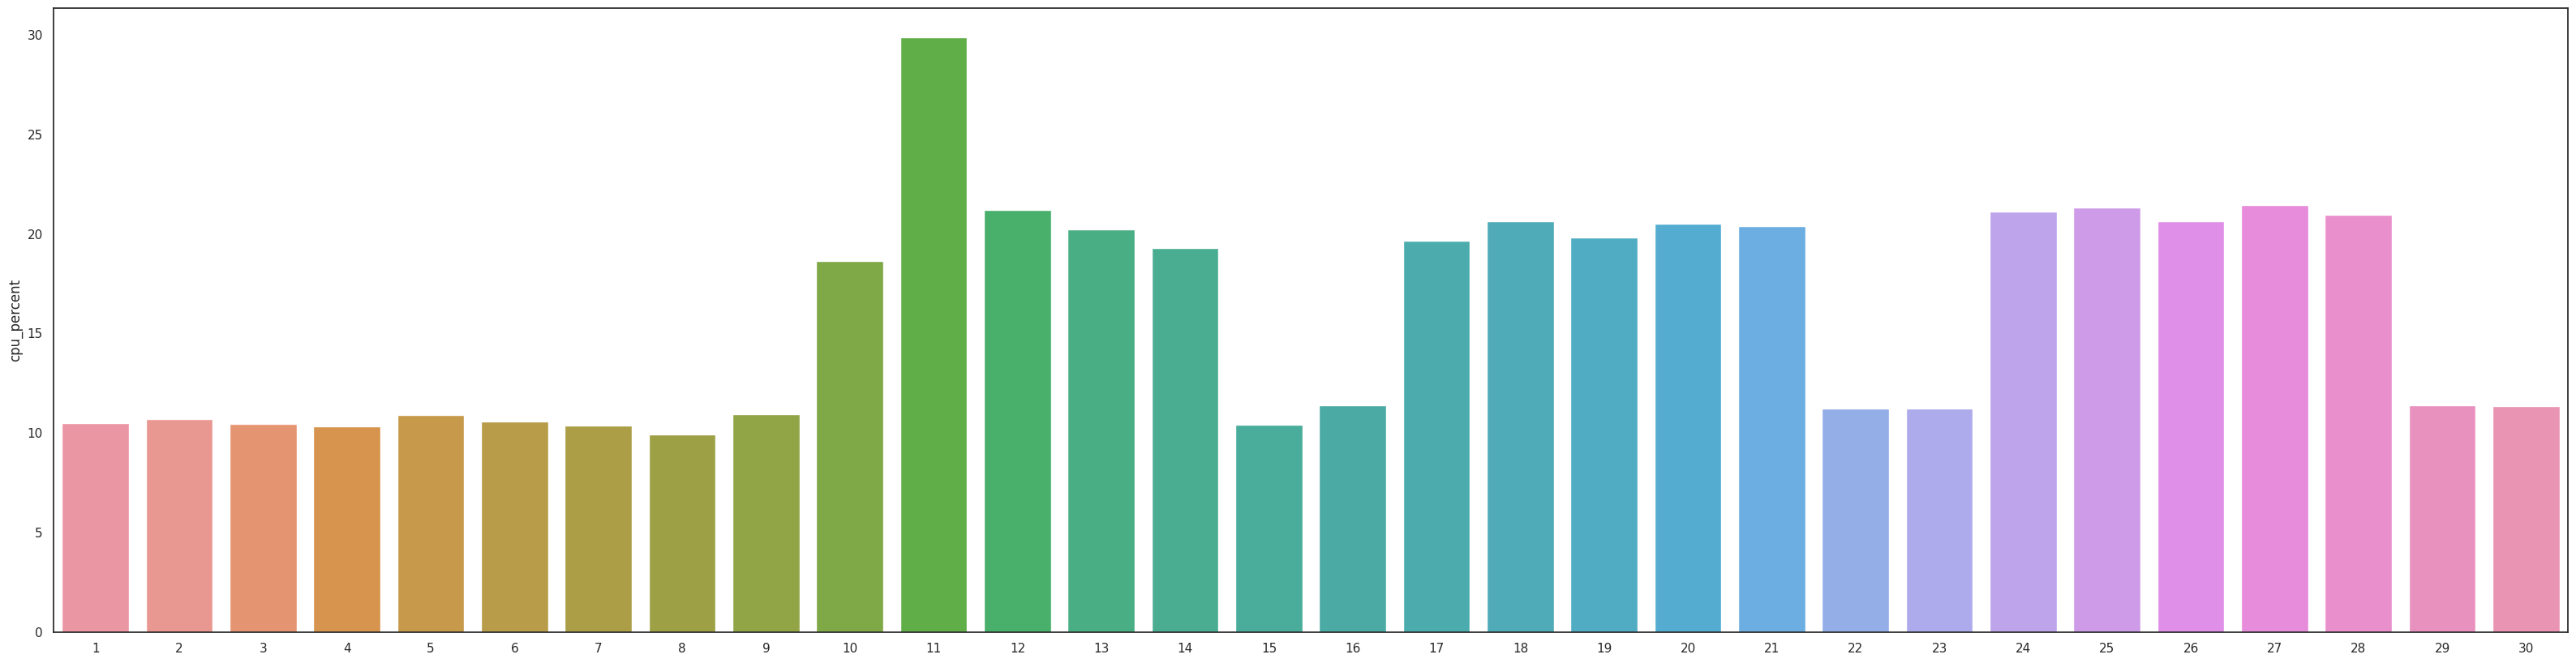

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(40, 10))
sns.barplot(data = total4, x = total4.index.tolist(), y = "cpu_percent" , ax = ax)
fig.savefig('subplots.jpg', format='jpg', dpi=800)

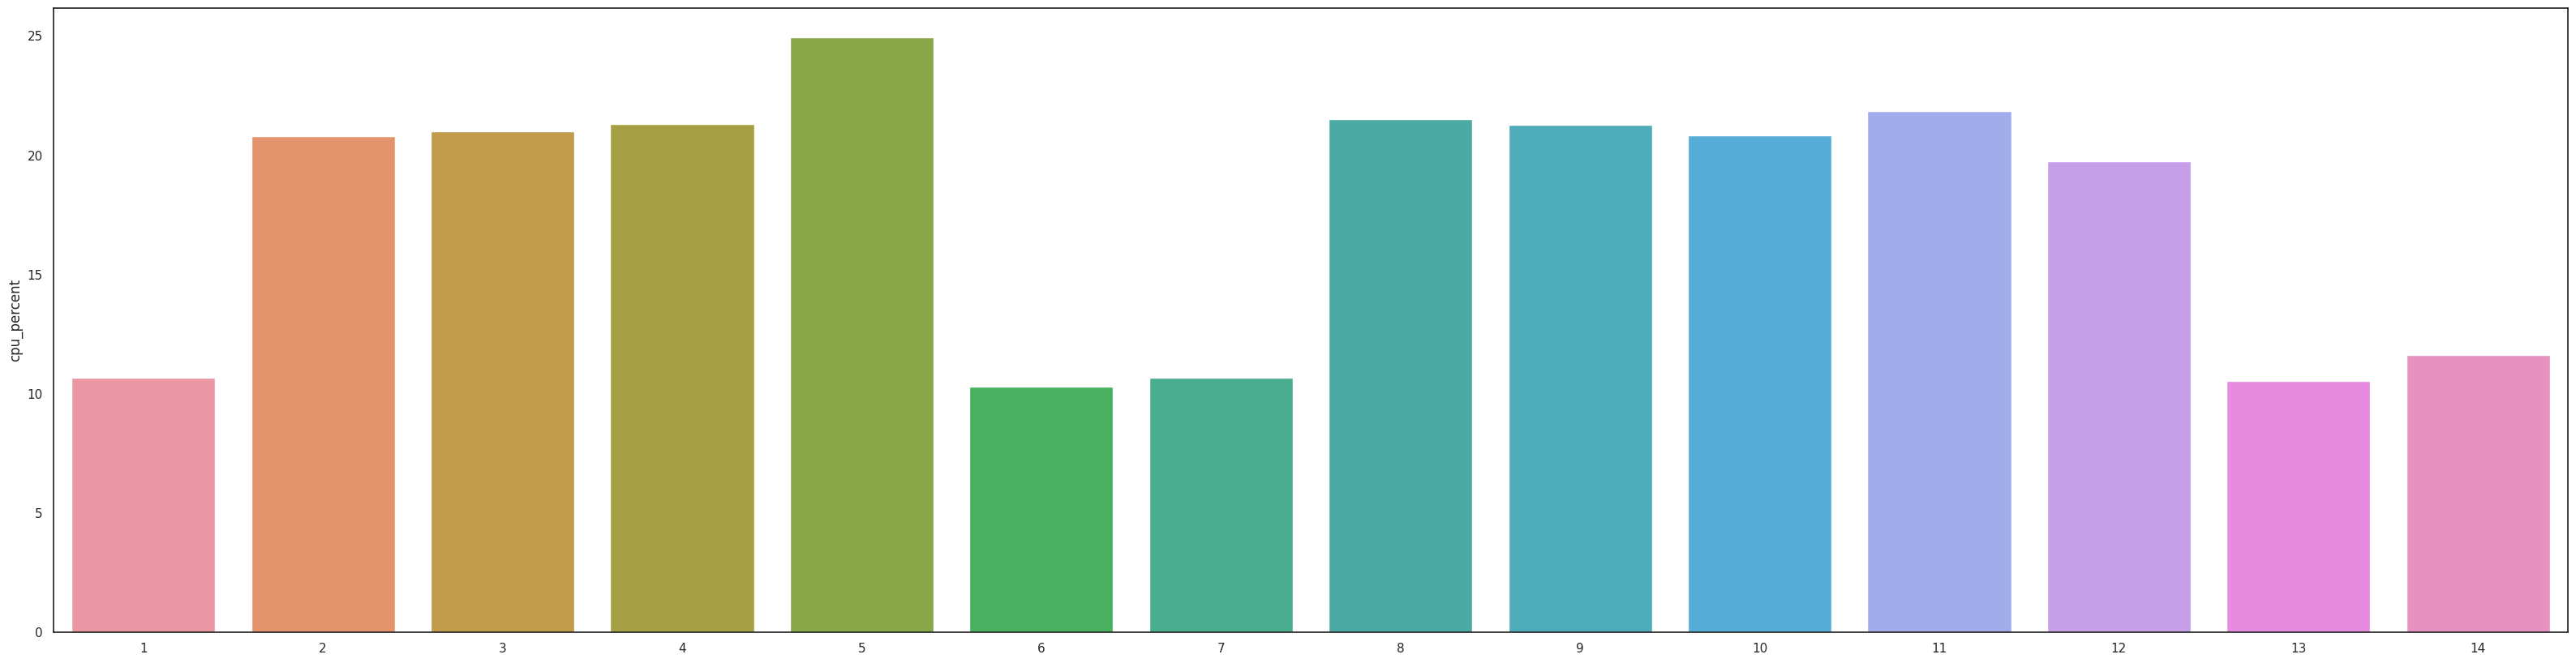

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(40, 10))
sns.barplot(data = total5, x = total5.index.tolist(), y = "cpu_percent" , ax = ax)
fig.savefig('subplots.jpg', format='jpg', dpi=800)

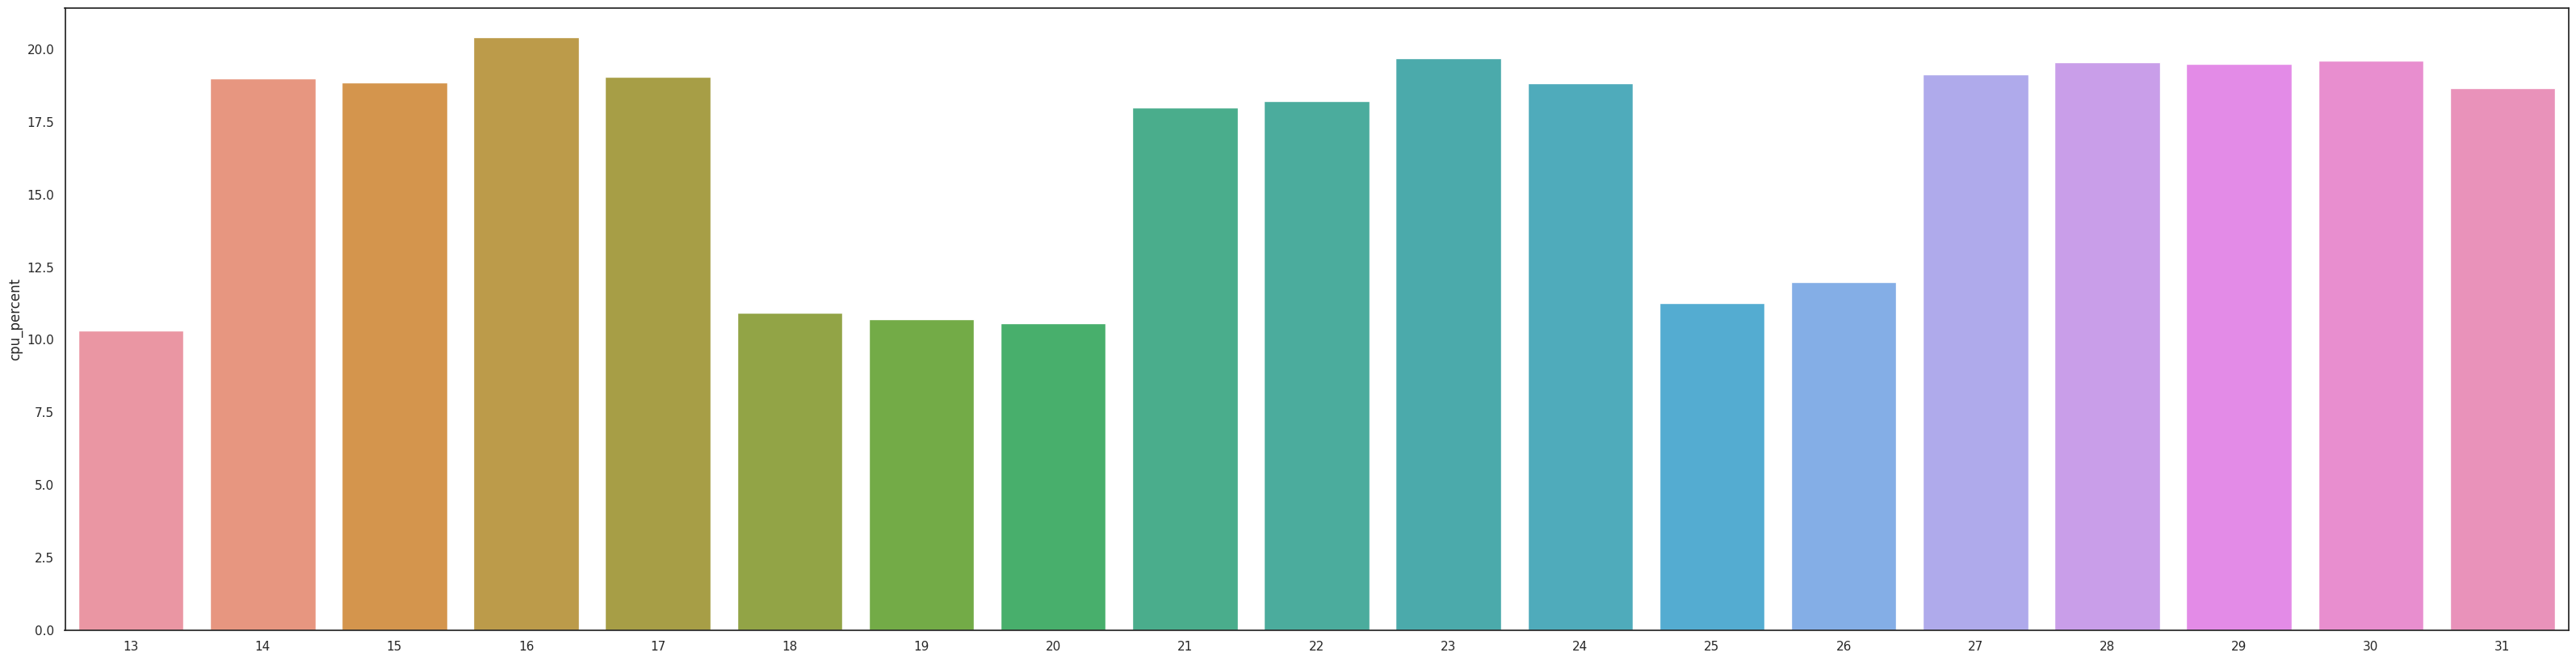

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(40, 10))
sns.barplot(data = total3, x = total3.index.tolist(), y = "cpu_percent" , ax = ax)
fig.savefig('subplots.jpg', format='jpg', dpi=800)

In [ ]:
hora_pico[hora_pico['ram_percent'] >= 80]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
13755,74.0,85.5,httpd,Scripts,python3,2023-04-11,09:06:00,Tuesday,09,06,4,April
13780,77.7,83.6,python3,httpd,amazon-cloudwatch-agent,2023-04-11,10:21:00,Tuesday,10,21,4,April
13799,62.7,83.6,Scripts,python3,redis-server,2023-04-11,11:18:00,Tuesday,11,18,4,April
13802,77.1,82.0,Scripts,python3,httpd,2023-04-11,11:27:00,Tuesday,11,27,4,April
13822,73.3,82.5,httpd,Scripts,python3,2023-04-11,12:27:00,Tuesday,12,27,4,April
13831,65.8,81.9,python3,httpd,redis-server,2023-04-11,12:54:00,Tuesday,12,54,4,April
13846,52.2,81.8,Scripts,python3,httpd,2023-04-11,13:39:00,Tuesday,13,39,4,April
14236,13.6,85.0,httpd,Scripts,uwsgi,2023-04-12,09:09:00,Wednesday,09,09,4,April
25289,98.5,81.6,Scripts,httpd,redis-server,2023-05-05,09:48:00,Friday,09,48,5,May
26727,93.0,80.6,Scripts,uwsgi,python3,2023-05-08,09:42:00,Monday,09,42,5,May
